In [101]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [124]:
df = pd.read_csv("C:/Users/ugurs/Desktop/train.csv",sep=',',escapechar="\\")

In [125]:
df[df["pagetype"] == "success"].head(15)

,date,sessionid,locale,pagetype,itemid,cartamount,productprice,oldproductprice,isinstock,issearched
1045,2019-02-20 00:01:32,3b3046cd-d93c-3049-d06e-0e16dbe64986_1550620899,tr_TR,success,"[""601938"",""597997"",""601647"",""598624""]",219.96,NaN,NaN,NaN,0
1081,2019-02-20 00:01:36,3b3046cd-d93c-3049-d06e-0e16dbe64986_1550620899,tr_TR,success,"[""601938"",""597997"",""601647"",""598624""]",219.96,NaN,NaN,NaN,0
1104,2019-02-20 00:01:37,680588eb-38f0-6c9b-3da2-017411bf527d_1550620804,tr_TR,success,"[""545973"",""595989"",""515180"",""535427"",""506522"",...",98.88,NaN,NaN,NaN,0
1132,2019-02-20 00:01:40,3b3046cd-d93c-3049-d06e-0e16dbe64986_1550620899,tr_TR,success,"[""601938"",""597997"",""601647"",""598624""]",219.96,NaN,NaN,NaN,0
1148,2019-02-20 00:01:42,3b3046cd-d93c-3049-d06e-0e16dbe64986_1550620899,tr_TR,success,"[""601938"",""597997"",""601647"",""598624""]",219.96,NaN,NaN,NaN,0
1298,2019-02-20 00:01:56,680588eb-38f0-6c9b-3da2-017411bf527d_1550620804,tr_TR,success,"[""545973"",""595989"",""515180"",""535427"",""506522"",...",98.88,NaN,NaN,NaN,0
1331,2019-02-20 00:01:58,680588eb-38f0-6c9b-3da2-017411bf527d_1550620804,tr_TR,success,"[""545973"",""595989"",""515180"",""535427"",""506522"",...",98.88,NaN,NaN,NaN,0
1348,2019-02-20 00:02:00,680588eb-38f0-6c9b-3da2-017411bf527d_1550620804,tr_TR,success,"[""545973"",""595989"",""515180"",""535427"",""506522"",...",98.88,NaN,NaN,NaN,0
1373,2019-02-20 00:02:02,8d060f10-8f2e-62bc-a183-763a55fef62f_1550620832,tr_TR,success,"""595687""",199.99,NaN,NaN,NaN,0
1376,2019-02-20 00:02:02,8d060f10-8f2e-62bc-a183-763a55fef62f_1550620832,tr_TR,success,"""595687""",199.99,NaN,NaN,NaN,0


In [119]:
df["issuccess"] = df["pagetype"] == "success"

In [115]:
df['date'] = pd.to_datetime(df['date'])

In [116]:
df['hourofday'] = df['date'].dt.hour

In [117]:
df["iscart"] = df["pagetype"] == "cart"

In [118]:
df["discountamount"] = (df["oldproductprice"] - df["productprice"])/ df["oldproductprice"]

In [77]:
df["date"].max()

Timestamp('2019-02-20 05:58:59')

In [78]:
df.corr()

,cartamount,productprice,oldproductprice,isinstock,issearched,issuccess,iscart,discountamount
cartamount,1.000000,-0.102532,-0.087382,0.038175,-0.021511,0.036486,0.103858,0.039000
productprice,-0.102532,1.000000,0.888310,0.018209,0.007425,NaN,NaN,-0.258801
oldproductprice,-0.087382,0.888310,1.000000,-0.042835,0.005712,NaN,NaN,0.111688
isinstock,0.038175,0.018209,-0.042835,1.000000,0.004246,NaN,NaN,-0.131973
issearched,-0.021511,0.007425,0.005712,0.004246,1.000000,-0.006934,-0.018638,-0.003974
issuccess,0.036486,NaN,NaN,NaN,-0.006934,1.000000,-0.005678,NaN
iscart,0.103858,NaN,NaN,NaN,-0.018638,-0.005678,1.000000,NaN
discountamount,0.039000,-0.258801,0.111688,-0.131973,-0.003974,NaN,NaN,1.000000


In [120]:
df.head()

,date,sessionid,locale,pagetype,itemid,cartamount,productprice,oldproductprice,isinstock,issearched,hourofday,iscart,discountamount,issuccess
0,2019-02-20,a0d567cf-689a-2ca5-4482-3a5d279b249c_1550620789,tr_TR,category,NaN,0.0,NaN,NaN,NaN,0,0,False,NaN,False
1,2019-02-20,00ae99d0-7c22-6e68-2c2a-4be1386aa460_1550620800,tr_TR,category,NaN,0.0,NaN,NaN,NaN,0,0,False,NaN,False
2,2019-02-20,f29d986b-18b0-4a4d-230f-e199c25caf80_1550620289,tr_TR,category,NaN,0.0,NaN,NaN,NaN,0,0,False,NaN,False
3,2019-02-20,48f60740-40b3-a82c-6eef-545533753d35_1550620800,tr_TR,other,NaN,0.0,NaN,NaN,NaN,0,0,False,NaN,False
4,2019-02-20,c7a5ed93-bb45-9218-ea9d-863656e2bd78_1550620974,NaN,productDetail,591754,NaN,NaN,NaN,NaN,0,0,False,NaN,False


In [122]:
df2 = df.groupby('sessionid').max()

In [123]:
df2.head()

,date,pagetype,cartamount,productprice,oldproductprice,isinstock,issearched,hourofday,iscart,discountamount,issuccess
sessionid,,,,,,,,,,,
00061c48-cd6a-f211-bf51-50202e7020a6_1550637212,2019-02-20 04:40:04,main,0.0,NaN,NaN,NaN,0,4,False,NaN,False
0006ccce-d92f-81c7-6365-5a7dcf1ba2f3_1550640764,2019-02-20 05:33:10,productDetail,0.0,139.99,199.99,1.0,0,5,False,0.300015,False
0009c18b-0d28-afbf-64c2-88ee9580b29a_1550639687,2019-02-20 05:14:48,productDetail,0.0,79.99,129.99,1.0,0,5,False,0.384645,False
000ae781-d3d0-7de9-7e2d-5d3ebaa6c415_1550639169,2019-02-20 04:12:47,productDetail,0.0,64.99,64.99,1.0,0,4,False,0.000000,False
000bad7d-67f0-58ed-dcbc-55cfdbf1b198_1550640990,2019-02-20 05:36:33,category,0.0,NaN,NaN,NaN,0,5,False,NaN,False


In [133]:
df2.corr()

,cartamount,productprice,oldproductprice,isinstock,issearched,hourofday,iscart,discountamount,issuccess
cartamount,1.000000,0.027168,0.036169,0.050333,0.046053,0.044063,0.463955,0.145002,0.209310
productprice,0.027168,1.000000,0.886494,0.067938,0.036047,-0.015885,-0.003916,-0.062607,-0.001423
oldproductprice,0.036169,0.886494,1.000000,0.021954,0.033339,0.004719,0.007476,0.207585,0.008699
isinstock,0.050333,0.067938,0.021954,1.000000,0.018781,0.037558,0.065121,-0.065738,0.026558
issearched,0.046053,0.036047,0.033339,0.018781,1.000000,0.005484,0.102319,0.061138,0.059037
hourofday,0.044063,-0.015885,0.004719,0.037558,0.005484,1.000000,0.039769,0.062234,0.009725
iscart,0.463955,-0.003916,0.007476,0.065121,0.102319,0.039769,1.000000,0.147180,0.353020
discountamount,0.145002,-0.062607,0.207585,-0.065738,0.061138,0.062234,0.147180,1.000000,0.070056
issuccess,0.209310,-0.001423,0.008699,0.026558,0.059037,0.009725,0.353020,0.070056,1.000000


In [126]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [134]:
# Split-out validation dataset
array = df2.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [135]:
# Load dataset
#url = "C:/Users/ugurs/Desktop/train.csv"
names = ['cartamount', 'productprice', 'oldproductprice', 'isinstock' , 'issearched','iscart' , 'discountamount' ,'hourofday', 'issuccess' ]
#dataset = pandas.read_csv(url, names=names)

In [137]:
df2.head()

,date,pagetype,cartamount,productprice,oldproductprice,isinstock,issearched,hourofday,iscart,discountamount,issuccess
sessionid,,,,,,,,,,,
00061c48-cd6a-f211-bf51-50202e7020a6_1550637212,2019-02-20 04:40:04,main,0.0,NaN,NaN,NaN,0,4,False,NaN,False
0006ccce-d92f-81c7-6365-5a7dcf1ba2f3_1550640764,2019-02-20 05:33:10,productDetail,0.0,139.99,199.99,1.0,0,5,False,0.300015,False
0009c18b-0d28-afbf-64c2-88ee9580b29a_1550639687,2019-02-20 05:14:48,productDetail,0.0,79.99,129.99,1.0,0,5,False,0.384645,False
000ae781-d3d0-7de9-7e2d-5d3ebaa6c415_1550639169,2019-02-20 04:12:47,productDetail,0.0,64.99,64.99,1.0,0,4,False,0.000000,False
000bad7d-67f0-58ed-dcbc-55cfdbf1b198_1550640990,2019-02-20 05:36:33,category,0.0,NaN,NaN,NaN,0,5,False,NaN,False


In [147]:
df2.fillna(0,inplace=True)

In [165]:
df2.head()

,cartamount,isinstock,iscart,discountamount,issuccess
sessionid,,,,,
00061c48-cd6a-f211-bf51-50202e7020a6_1550637212,0.0,0.0,False,0.000000,False
0006ccce-d92f-81c7-6365-5a7dcf1ba2f3_1550640764,0.0,1.0,False,0.300015,False
0009c18b-0d28-afbf-64c2-88ee9580b29a_1550639687,0.0,1.0,False,0.384645,False
000ae781-d3d0-7de9-7e2d-5d3ebaa6c415_1550639169,0.0,1.0,False,0.000000,False
000bad7d-67f0-58ed-dcbc-55cfdbf1b198_1550640990,0.0,0.0,False,0.000000,False


In [166]:
df2.corr()

,cartamount,isinstock,iscart,discountamount,issuccess
cartamount,1.000000,0.149625,0.464156,0.193265,0.209406
isinstock,0.149625,1.000000,0.159288,0.630362,0.068724
iscart,0.464156,0.159288,1.000000,0.198026,0.353020
discountamount,0.193265,0.630362,0.198026,1.000000,0.091748
issuccess,0.209406,0.068724,0.353020,0.091748,1.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

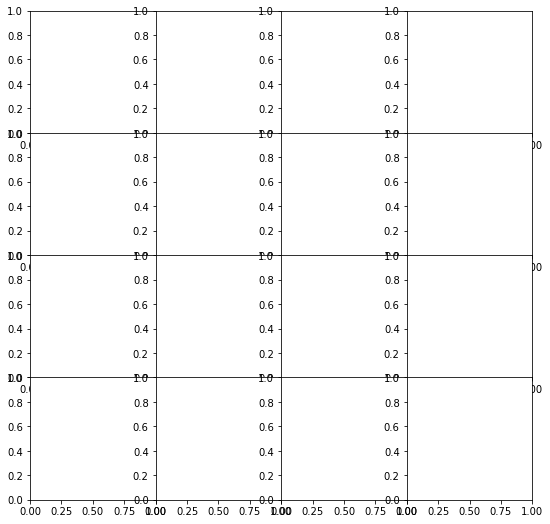

In [162]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['cartamount', 'isinstock', 'iscart', 'discountamount']
X = df2[feature_names]
y = df2['issuccess']

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [167]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.95
Accuracy of LDA classifier on test set: 0.96


In [169]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.95


In [170]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [222]:
df3 = pd.read_csv("C:/Users/ugurs/Desktop/test.csv",sep=',',escapechar="\\")

In [223]:
df3["iscart"] = df3["pagetype"] == "cart"

In [224]:
df3["discountamount"] = (df3["oldproductprice"] - df3["productprice"])/ df3["oldproductprice"]

In [208]:
df3.head()

,date,sessionid,locale,pagetype,itemid,cartamount,productprice,oldproductprice,isinstock,issearched,iscart,discountamount
0,2019-02-20 05:58:59,f1e073ff-7ad6-55ab-0d96-46448981db0e_1550641927,tr_TR,other,NaN,0.00,NaN,NaN,NaN,0,False,NaN
1,2019-02-20 05:58:59,5d67b002-3996-8ac6-dec3-126a3a032a5c_1550646559,tr_TR,productDetail,600032,59.99,59.99,59.99,1.0,0,False,0.0
2,2019-02-20 05:58:59,d8fd6aea-3e67-90c3-f3ef-11c680ca2201_1550641732,NaN,productDetail,593827,NaN,NaN,NaN,NaN,0,False,NaN
3,2019-02-20 05:58:59,ddc11606-192c-fa84-583e-860bdd0dc660_1550641778,tr_TR,category,NaN,24.99,NaN,NaN,NaN,0,False,NaN
4,2019-02-20 05:58:59,0a58efb6-2d4f-2b5b-f91d-c68d94921428_1550639400,tr_TR,category,NaN,0.00,NaN,NaN,NaN,0,False,NaN


In [225]:
df3 = df3.groupby('sessionid').max()

In [210]:
df3.head()

,date,pagetype,cartamount,productprice,oldproductprice,isinstock,issearched,iscart,discountamount
sessionid,,,,,,,,,
0006f4b4-129d-7585-c2d1-b011fda4a78e_1550642677,2019-02-20 06:14:41,register,0.00,10.99,19.99,0.0,0,False,0.450225
0014f941-677b-74bb-a691-2bf203997857_1550642659,2019-02-20 06:05:20,productDetail,0.00,19.99,24.99,1.0,0,False,0.200080
0028e403-7194-aa13-8a41-8345102092ac_1550643264,2019-02-20 06:14:25,productDetail,0.00,49.99,49.99,1.0,0,False,0.000000
002be665-a466-628b-8025-d2e9217b3547_1550642937,2019-02-20 06:08:58,other,264.96,NaN,NaN,NaN,0,False,NaN
0035cc57-8742-c08d-4867-e3200f4457ee_1550642953,2019-02-20 06:09:14,other,0.00,NaN,NaN,NaN,0,False,NaN


In [233]:
df4.drop(['date','pagetype', 'productprice', 'oldproductprice', 'issearched'],inplace=True,axis = 1)

In [212]:
df3.fillna(0,inplace = True)

In [214]:
df3.head()

,cartamount,isinstock,iscart,discountamount
sessionid,,,,
0006f4b4-129d-7585-c2d1-b011fda4a78e_1550642677,0.00,0.0,False,0.450225
0014f941-677b-74bb-a691-2bf203997857_1550642659,0.00,1.0,False,0.200080
0028e403-7194-aa13-8a41-8345102092ac_1550643264,0.00,1.0,False,0.000000
002be665-a466-628b-8025-d2e9217b3547_1550642937,264.96,0.0,False,0.000000
0035cc57-8742-c08d-4867-e3200f4457ee_1550642953,0.00,0.0,False,0.000000


In [215]:
df3 = scaler.fit_transform(df3)

In [216]:
gnb.predict(df3)

array([False, False, False, ..., False, False, False])

In [217]:
predict=gnb.predict(df3)

In [226]:
predict

array([False, False, False, ..., False, False, False])

In [227]:
df3['prediction'] = predict

In [193]:
df3.to_csv(r'FileName6.csv')

In [230]:
df4 = df4.drop(['cartamount','isinstock','iscart','discountamount'],axis=1)

KeyError: "labels ['cartamount' 'isinstock' 'iscart' 'discountamount'] not contained in axis"

In [234]:
df4.to_csv(r'FileName7.csv')

In [232]:
df4.head()

,date,pagetype,productprice,oldproductprice,issearched,prediction
sessionid,,,,,,
0006f4b4-129d-7585-c2d1-b011fda4a78e_1550642677,2019-02-20 06:14:41,register,10.99,19.99,0,False
0014f941-677b-74bb-a691-2bf203997857_1550642659,2019-02-20 06:05:20,productDetail,19.99,24.99,0,False
0028e403-7194-aa13-8a41-8345102092ac_1550643264,2019-02-20 06:14:25,productDetail,49.99,49.99,0,False
002be665-a466-628b-8025-d2e9217b3547_1550642937,2019-02-20 06:08:58,other,NaN,NaN,0,False
0035cc57-8742-c08d-4867-e3200f4457ee_1550642953,2019-02-20 06:09:14,other,NaN,NaN,0,False


In [198]:
df3['cartamount'].max()

3345.079999999995

In [201]:
df3

array([[0.        , 0.        , 0.        , 0.57864647, 0.        ],
       [0.        , 1.        , 0.        , 0.25715048, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 1.        , 0.        , 0.72780094, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ]])